# Шифрин Марк Т2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF

**A)**
Определить по выборке моду, медиану. размах, оценку коэффициента асимметрии

In [9]:
np.random.seed(42)
n = 25
sample = np.random.exponential(scale=1, size=n)

# Подсчет моды
mode = sample[np.argmax(np.bincount(sample.astype(int)))]
print(f"Мода: {mode:.2f}")

# Подсчет медианы
median = np.median(sample)
print(f"Медиана: {median:.2f}")

# Подсчет размаха
range_ = np.ptp(sample)
print(f"Размах: {range_:.2f}")

# Подсчет оценки коэффициента асимметрии
skewness = skew(sample)
print(f"Коэффициент асимметрии: {skewness:.2f}")

Мода: 0.47
Медиана: 0.47
Размах: 3.48
Коэффициент асимметрии: 1.70


**B)**
Построить эмпирическую функцию распределения, гистограмму и boxplot

Text(0.5, 1.0, 'Эмпирическая функция распределения')

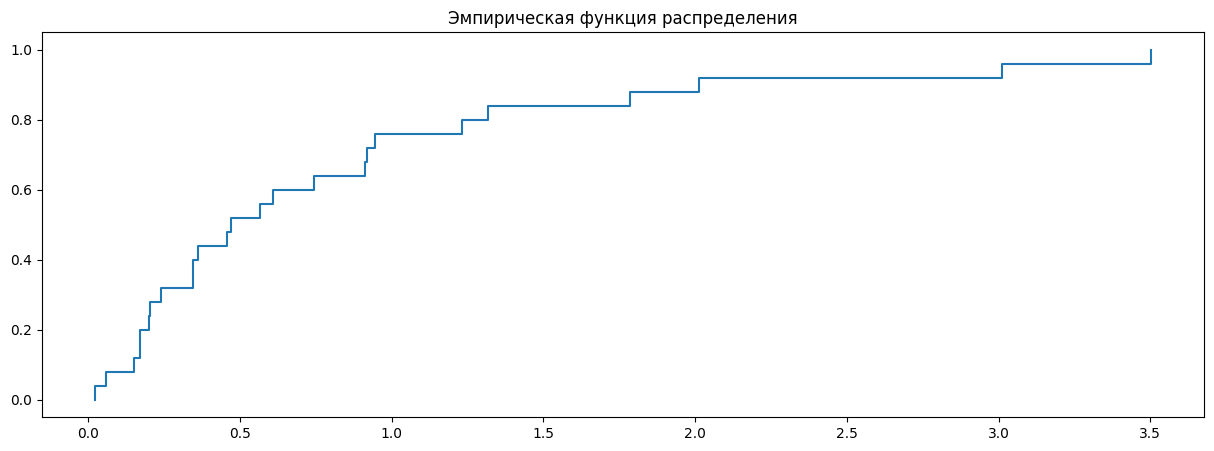

In [10]:
plt.figure(figsize=(15, 5))

# Эмпирическая функция распределения
plt.subplot(1, 1, 1)
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, where="post")
plt.title("Эмпирическая функция распределения")

5


Text(0.5, 1.0, 'Гистограмма')

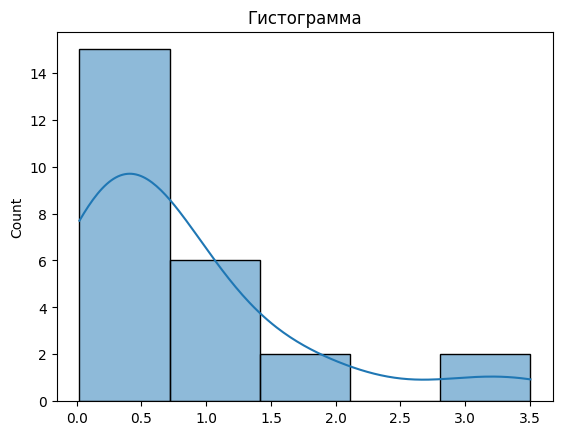

In [11]:
# Гистограмма
import math

# Подсчет бинов
bins_cnt = int(range_ / (range_ / (1 + math.log(n, 2))))
print(bins_cnt)

plt.subplot(1, 1, 1)
sns.histplot(sample, bins=bins_cnt, kde=True)
plt.title("Гистограмма")

Text(0.5, 1.0, 'Boxplot')

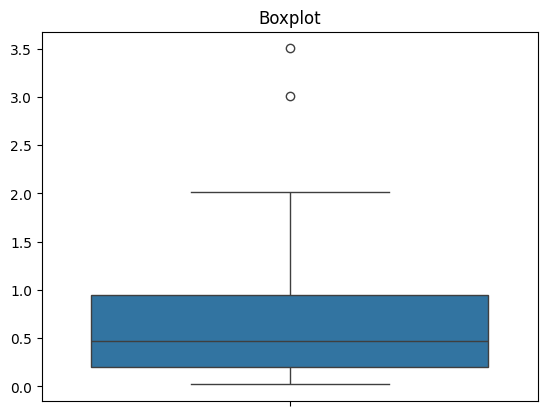

In [12]:
# Boxplot

plt.subplot(1, 1, 1)
sns.boxplot(sample)
plt.title("Boxplot")

**C)**
Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

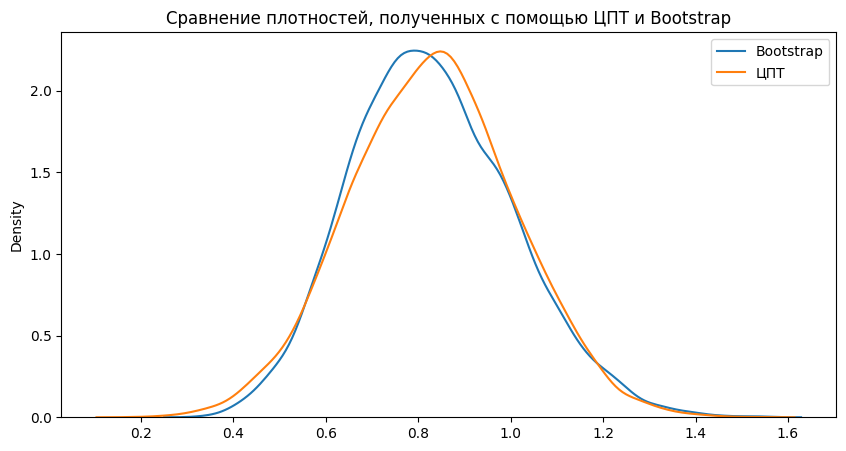

In [13]:
means = [np.mean(np.random.choice(sample, size=n, replace=True)) for _ in range(10000)]

plt.figure(figsize=(10, 5))
sns.kdeplot(means, label="Bootstrap")
sns.kdeplot(np.random.normal(np.mean(sample), np.std(sample) / np.sqrt(n), size=10000), label="ЦПТ")
plt.legend()
plt.title("Сравнение плотностей, полученных с помощью ЦПТ и Bootstrap")
plt.show()

**D)**
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициента асимметрии будет меньше 1

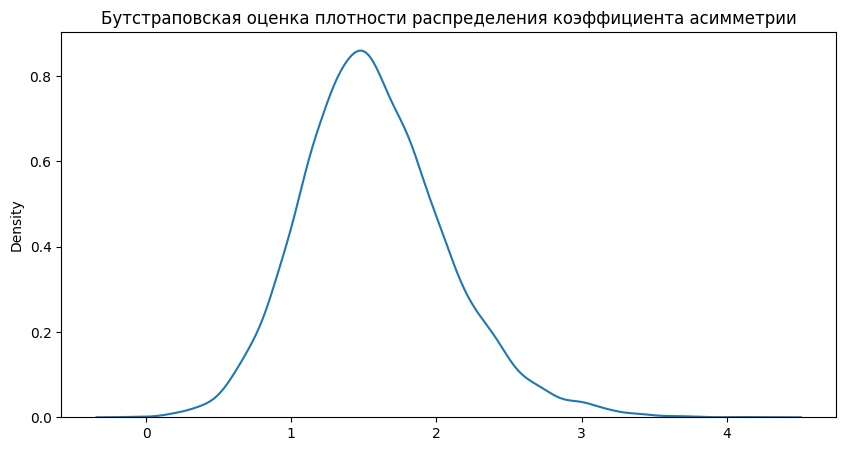

P(skewness < 1): 0.11


In [14]:
bootstrap_skewness = [skew(np.random.choice(sample, size=n, replace=True)) for _ in range(10000)]
plt.figure(figsize=(10, 5))
sns.kdeplot(bootstrap_skewness)
plt.title('Бутстраповская оценка плотности распределения коэффициента асимметрии')
plt.show()
probability = np.mean(np.array(bootstrap_skewness) < 1)
print(f"P(skewness < 1): {probability:.2f}")

**E)**
Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

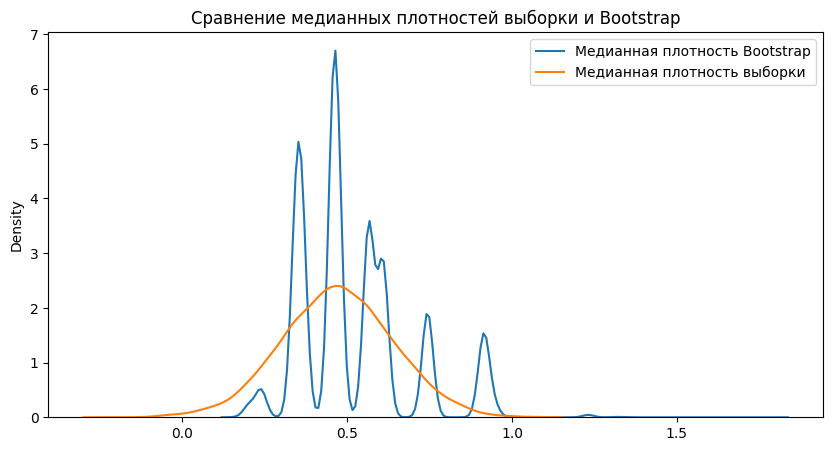

In [17]:
bootstrap_medians = [np.median(np.random.choice(sample, size=n, replace=True)) for _ in range(10000)]
plt.figure(figsize=(10, 5))
sns.kdeplot(bootstrap_medians, label="Медианная плотность Bootstrap")
sns.kdeplot(np.random.normal(median, np.std(bootstrap_medians), size=10000), label="Медианная плотность выборки")
plt.legend()
plt.title("Сравнение медианных плотностей выборки и Bootstrap")
plt.show()